<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ellaesalex/blob/main/Ejercicios/Regresiones%20y%20K%20means/Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Actividad Semanal -- 7 Regresion lineal polinomial**
Maestría en Inteligencia Artificial Aplicada

Tecnológico de Monterrey

Materia: Ciencia y Analítica de Datos

**Profesor Titular:**
- María de la Paz Rico Fernández

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de la estudiante:**
- Alejandra Mendoza Flores 

**Matricula:**
- A01793032

**Fecha:**
- 08 de noviembre 2022

##**Ejercicio 1.**

Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')
# to make this notebook's output stable across runs

%matplotlib inline

In [2]:
SEED=42

In [3]:
np.random.seed(SEED)

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [5]:
from pandas.core.common import random_state
X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (800, 1)
y_train.shape: (800,)
X_test.shape: (200, 1)
y_test.shape: (200,)


2. Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [6]:
nombres, scores_r2, scores_mae = [], [], []

In [7]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)
y_hat_train = lr_regressor.predict(X_train)
y_hat_test = lr_regressor.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train),r2_score(y_test, y_hat_test))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train),mean_squared_error(y_test,y_hat_test))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train),mean_absolute_error(y_test,y_hat_test))
)

nombres.append('Linear Regression')
scores_r2.append([
    r2_score(y_train, y_hat_train),
    r2_score(y_test, y_hat_test),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train),
    mean_absolute_error(y_test, y_hat_test),
])

R2 	= 	Train: 0.5797	Test: 0.5696
MSE 	= 	Train: 50.2992	Test: 35.1974
MAE 	= 	Train: 5.0534	Test: 4.5139


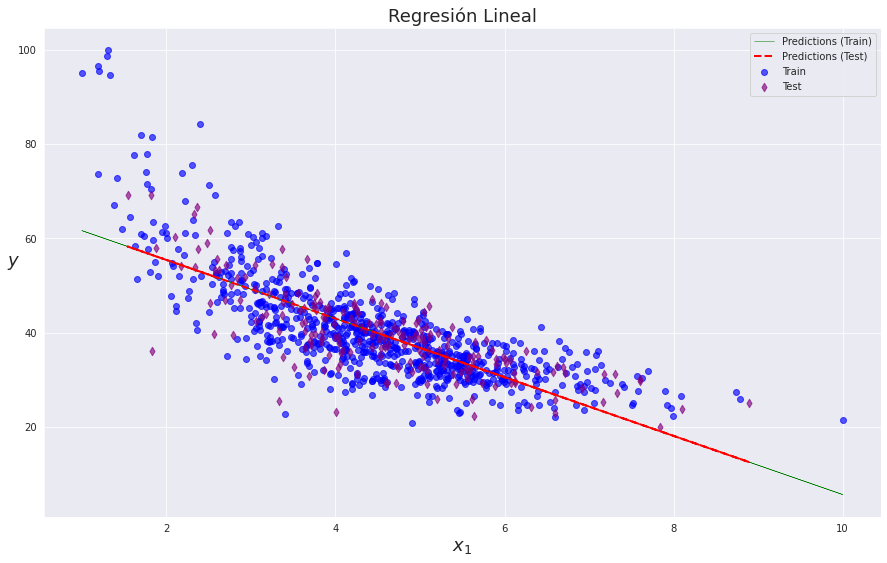

In [8]:
plt.figure (figsize=(15, 9))
plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.65, marker='o')
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.65, marker='d')
plt.plot(X_train, y_hat_train, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashed')
plt. legend()

plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Lineal", fontsize=18)
plt. show()

3. Regresión Polinomial

- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [9]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
poly_features.fit(X_train)

X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_hat_train_poly = lr_poly.predict(X_train_poly)
y_hat_test_poly = lr_poly.predict(X_test_poly)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_poly), r2_score(y_test, y_hat_test_poly))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_poly), mean_squared_error(y_test,y_hat_test_poly))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_poly), mean_absolute_error(y_test,y_hat_test_poly))
)

nombres.append('PolynomialFeatures')
scores_r2.append([
    r2_score(y_train, y_hat_train_poly),
    r2_score(y_test, y_hat_test_poly),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_poly),
    mean_absolute_error(y_test, y_hat_test_poly),
])

R2 	= 	Train: 0.7061	Test: 0.6140
MSE 	= 	Train: 35.1716	Test: 31.5616
MAE 	= 	Train: 4.5021	Test: 4.2451


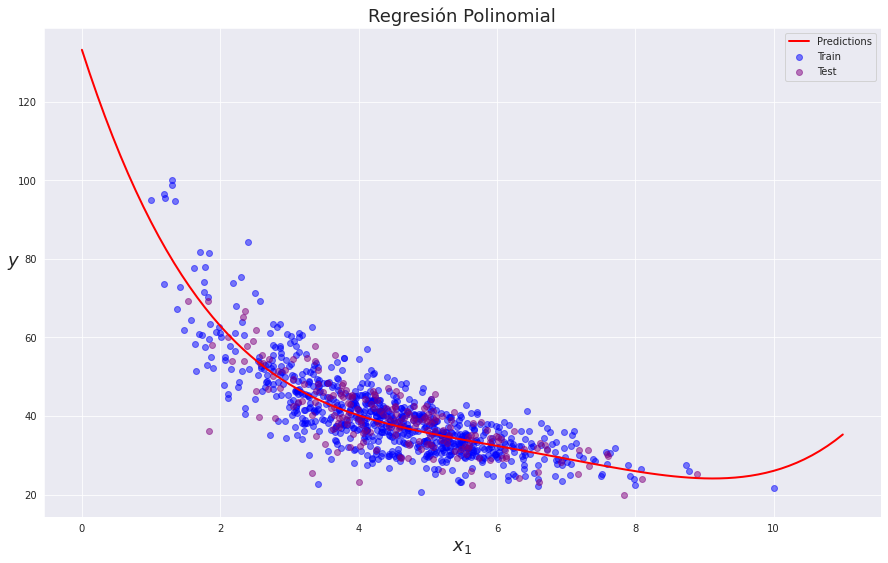

In [10]:
import warnings 
warnings.filterwarnings('ignore')

X_new = np.linspace(0, 11, 100) .reshape (100, 1)
X_new_poly=poly_features.transform(X_new)
y_new = lr_poly.predict(X_new_poly)

plt.figure (figsize=(15, 9))
plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_new, y_new, color='red', label='Predictions', linewidth=2)

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Polinomial", fontsize=18)
plt.show()

4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

**Ridge**

In [11]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=Ridge(random_state=SEED),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'solver': ['auto', 'svd', 'cholesky', 'lsar', 'sparse_cg', 'sag', 'saga'],
      'positive': [True, False]
    },
    cv=5, 
    n_jobs=-1,
)

res = grid.fit(X_train, y_train)
print ("Best params:", res.best_params_)
print ("Best score:", res.best_score_)

Best params: {'alpha': 10, 'positive': False, 'solver': 'sag'}
Best score: 0.5676777035260054


In [12]:
ridge_model = Ridge(alpha=10, solver='sag', positive=False)
ridge_model.fit(X_train, y_train)

y_hat_train_ridge = ridge_model.predict(X_train)
y_hat_test_ridge = ridge_model.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_ridge), r2_score(y_test, y_hat_test_ridge))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_ridge), mean_squared_error(y_test,y_hat_test_ridge))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_ridge), mean_absolute_error(y_test,y_hat_test_ridge))
)

nombres.append('Ridge')
scores_r2.append([
    r2_score(y_train, y_hat_train_ridge),
    r2_score(y_test, y_hat_test_ridge),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_ridge),
    mean_absolute_error(y_test, y_hat_test_ridge),
])

R2 	= 	Train: 0.5797	Test: 0.5712
MSE 	= 	Train: 50.3021	Test: 35.0675
MAE 	= 	Train: 5.0484	Test: 4.5066


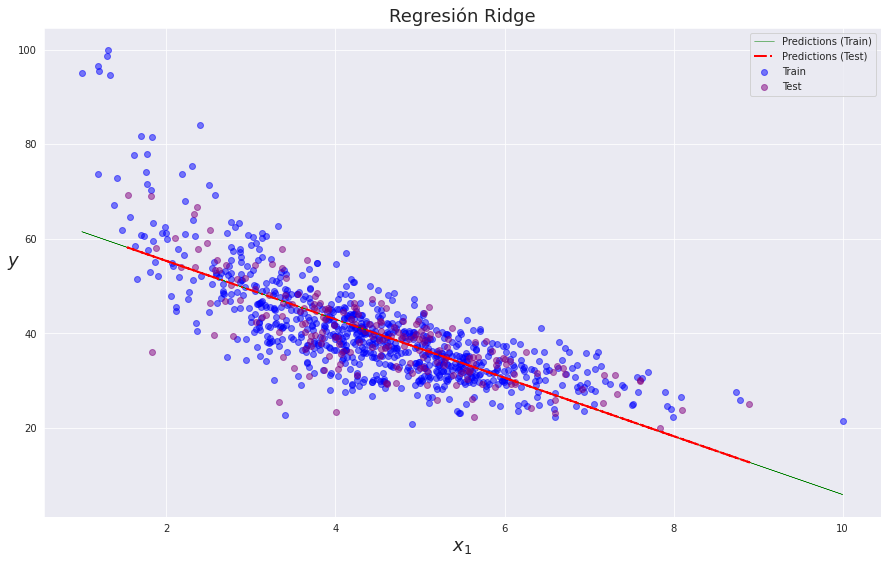

In [13]:
plt.figure (figsize=(15, 9))

plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_train, y_hat_train_ridge, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test_ridge, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashdot')

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Ridge", fontsize=18)
plt.show()

**Lasso**

In [14]:
grid = GridSearchCV(
    estimator=Lasso(random_state=SEED),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    cv=5, 
    n_jobs=-1,
)

res = grid.fit(X_train, y_train)
print ("Best params:", res.best_params_)
print ("Best score:", res.best_score_)

Best params: {'alpha': 0.1}
Best score: 0.5675309306307815


In [15]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_hat_train_lasso = lasso_model.predict(X_train)
y_hat_test_lasso = lasso_model.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_lasso), r2_score(y_test, y_hat_test_lasso))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_lasso), mean_squared_error(y_test,y_hat_test_lasso))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_lasso), mean_absolute_error(y_test,y_hat_test_lasso))
)



nombres.append('Lasso')
scores_r2.append([
    r2_score(y_train, y_hat_train_lasso),
    r2_score(y_test, y_hat_test_lasso),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_lasso),
    mean_absolute_error(y_test, y_hat_test_lasso),
])

R2 	= 	Train: 0.5796	Test: 0.5718
MSE 	= 	Train: 50.3048	Test: 35.0189
MAE 	= 	Train: 5.0465	Test: 4.5038


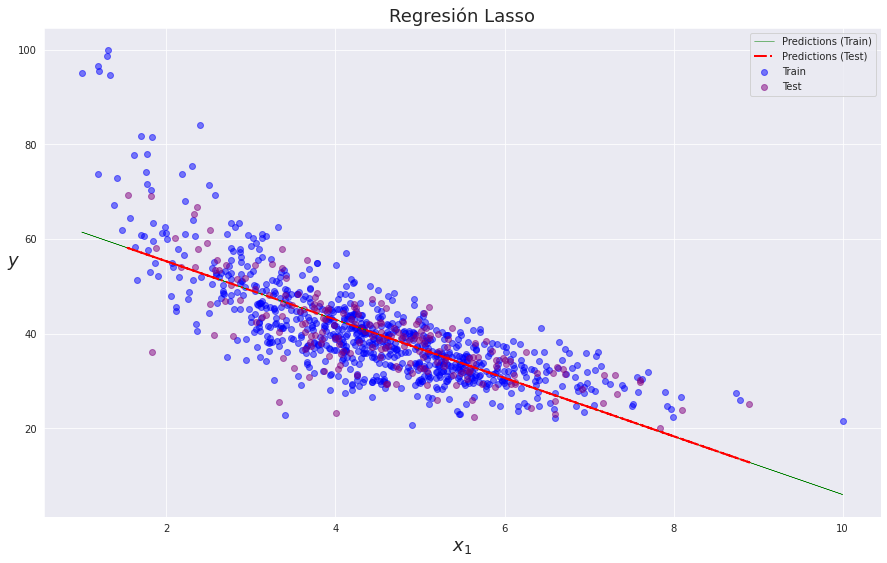

In [16]:
plt.figure (figsize=(15, 9))

plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_train, y_hat_train_lasso, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test_lasso, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashdot')

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Lasso", fontsize=18)
plt.show()

5. Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

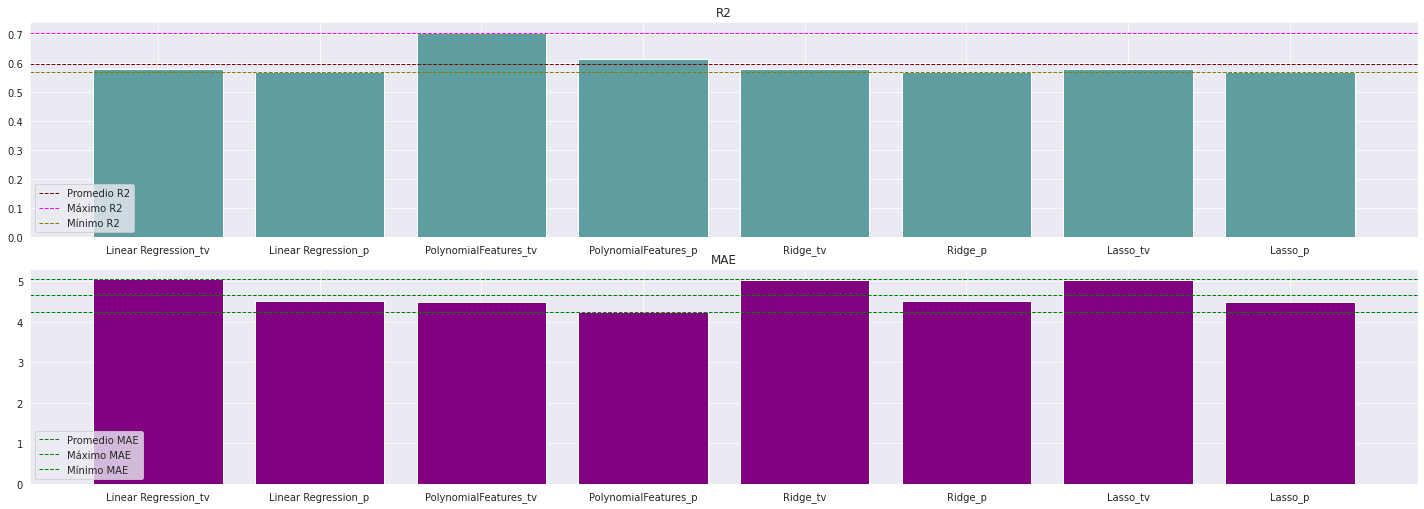

In [17]:
from matplotlib import legend
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
plt.tight_layout()

promedio_r2 = np.mean(scores_r2)
max_r2 = np.max(scores_r2)
min_r2 = np.min(scores_r2)
ax[0].axhline(promedio_r2, color='maroon', linestyle='dashed', linewidth=1, label='Promedio R2')
ax[0].axhline(max_r2, color='magenta', linestyle='dashed', linewidth=1, label='Máximo R2')
ax[0].axhline(min_r2, color='olive', linestyle='dashed', linewidth=1, label='Mínimo R2')

promedio_mae = np.mean(scores_mae)
max_mae = np.max(scores_mae)
min_mae = np.min(scores_mae)
ax[1].axhline(promedio_mae, color='green', linestyle='dashed', linewidth=1, label='Promedio MAE')
ax[1].axhline(max_mae, color='green', linestyle='dashed', linewidth=1, label='Máximo MAE')
ax[1].axhline(min_mae, color='green', linestyle='dashed', linewidth=1, label='Mínimo MAE')

for i, nombre in enumerate(nombres):
  ax[0].set_title('R2')
  ax[0].bar([f'{nombre}_tv', f'{nombre}_p'], scores_r2[i], color='cadetblue')

  ax[1].set_title('MAE')
  ax[1].bar([f'{nombre}_tv', f'{nombre}_p'], scores_mae[i], color='purple')

ax[0].legend()
ax[1].legend()
plt.show()

6. Explica tus resultados

- ¿Qué método conviene más a la empresa, y por qué?

El método de regresión polinomial es el método que más le conviene a la empresa, ya que fue el que tuvo menor rango de error y un r2 mayor. De igual manera lo podemos confirmar en la gráfica a través de la curvatura presentada. Por otro lado, Lasso y Ridge no presentaron un resultado postivo considerable y la línea en los gráficos se presenta en línea recta.

- ¿Qué porcentajes de entrenamiento y evaluación?

Se manejo la partición que previamente se ha utilizado: 80% en entrenamiento y 20% en evaluación.

- ¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?

  - Regresión linear
    - R2 (Entrenamiento): 0.5797  
    - R2 (Evaluación): 0.5696
    - MAE (Entrenamiento): 5.0534
    - MAE (Evaluación): 4.5139
  - Regresión polinomial
    - R2 (Entrenamiento): 0.7061 
    - R2 (Evaluación): 0.6140
    - MAE (Entrenamiento): 4.5021	
    - MAE (Evaluación): 4.2451
  - Ridge
    - R2 (Entrenamiento): 0.5797	
    - R2 (Evaluación): 0.5712
    - MAE (Entrenamiento): 5.0484
    - MAE (Evaluación): 4.5066
  - Lasso
    - R2 (Entrenamiento): 0.5796
    - R2 (Evaluación): 0.5718
    - MAE (Entrenamiento): 5.0465
    - MAE (Evaluación): 4.5038

El uso de la regresión ayudó a tener buenos resultados; sin embargo, aún se presentar niveles de errores altos, se podrían probar otros métodos para comparar los resultados y analizar cual es el más conveniente. La regresión polinomial fue la que presentó mejor desempeño. 

##**Ejercicio 2.**
Regresión múltiple. Encuentra el mejor regresor para los datos de las casas:

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9806,9407150310,20150128T000000,357000.0,4,2.50,1980,9757,2.0,0,0,...,7,1980,0,1995,0,98038,47.3675,-122.019,1610,6147
19856,7237501370,20140717T000000,1079000.0,4,3.25,4800,12727,2.0,0,0,...,10,4800,0,2011,0,98059,47.5311,-122.134,4750,13602
5870,3416601045,20140623T000000,345000.0,3,1.00,1140,4200,2.0,0,0,...,7,1140,0,1904,0,98144,47.6012,-122.296,1510,4000
3369,9407101380,20141230T000000,189000.0,3,2.00,1460,11481,1.0,0,0,...,7,1170,290,1995,0,98045,47.4493,-121.777,1540,9680
13685,3123059107,20140520T000000,555000.0,3,2.50,3050,158558,1.0,0,0,...,9,3050,0,1987,0,98055,47.4326,-122.208,2960,31050
11551,1938000140,20150428T000000,810000.0,4,2.00,2920,10424,1.0,0,0,...,8,1520,1400,1964,0,98005,47.5876,-122.172,2360,10696
283,7202360350,20140630T000000,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
3894,2085200261,20150218T000000,422500.0,3,2.00,1960,6450,1.0,0,0,...,7,1000,960,1977,0,98038,47.3972,-122.029,1660,20720
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
19723,1085622860,20140721T000000,384435.0,3,2.50,2029,3906,2.0,0,0,...,9,2029,0,2014,0,98003,47.3410,-122.180,2029,3920


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

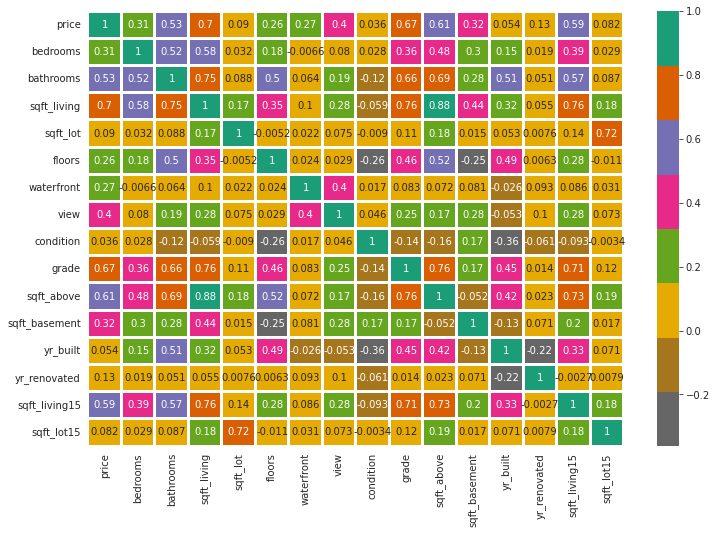

In [22]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [23]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


2. Regresión Múltiple Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [25]:
nombres, scores_r2, scores_mae = [], [], []

In [26]:
def print_model_scores(y_train, y_hat_train, y_test, y_hat_test):
  print(
    "R2 \t= \tTrain: %.4f\tTest: %.4f" %
    (r2_score(y_train,y_hat_train),r2_score(y_test, y_hat_test))
  )

  print(
    "MSE \t= \tTrain: %.4f\tTest: %.4f" %
    (mean_squared_error(y_train,y_hat_train),mean_squared_error(y_test, y_hat_test))
  )

  print(
    "MAE \t= \tTrain: %.4f\tTest: %.4f" %
    (mean_absolute_error(y_train,y_hat_train),mean_absolute_error(y_test, y_hat_test))
  )

In [27]:
from sklearn import linear_model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_hat_train = lr_model.predict(X_train)
y_hat_test = lr_model.predict(X_test)

print_model_scores(y_train, y_hat_train, y_test, y_hat_test)

nombres.append('Regresión Lineal')
scores_r2.append([
    r2_score(y_train, y_hat_train),
    r2_score(y_test, y_hat_test),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train),
    mean_absolute_error(y_test, y_hat_test),
])

R2 	= 	Train: 0.6529	Test: 0.6580
MSE 	= 	Train: 45896584783.5822	Test: 53885900364.4939
MAE 	= 	Train: 139269.3294	Test: 137480.1388


In [28]:
lr_model.coef_, lr_model.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

**Ecuación y ordenada al origen**

$$ 
\begin{aligned}
y =
-3.82008048^{1e+04} x_{1}
+4.14661380^{1e+04} x_{2}
+1.07992584^{1e+02} x_{3}
+1.71356997^{1e-02} x_{4}\\\
+3.16916913^{1e+04} x_{5}
+5.52691023^{1e+05} x_{6}
+4.12493228^{1e+04} x_{6}
+2.12221443^{1e+04} x_{8}\\\
+1.19493216^{1e+05} x_{9}
+4.77750272^{1e+01} x_{10}
+6.02175566^{1e+01} x_{11}
-3.55090216^{1e+03} x_{12}\\\
+1.32602215^{1e+01} x_{13}
+2.90059284^{1e+01} x_{14}
-5.48132603^{1e-01} x_{15}
+6151359.26274218
\end{aligned}
$$

3. Regresión Múltiple Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [29]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X_train)

X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

y_hat_train_poly = poly_model.predict(X_train_poly)
y_hat_test_poly = poly_model.predict(X_test_poly)

print_model_scores(y_train, y_hat_train_poly, y_test, y_hat_test_poly)

nombres.append('Regresión Múltiple Polinomial')
scores_r2.append([
    r2_score(y_train, y_hat_train_poly),
    r2_score(y_test, y_hat_test_poly),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_poly),
    mean_absolute_error(y_test, y_hat_test_poly),
])

R2 	= 	Train: 0.7470	Test: 0.7798
MSE 	= 	Train: 33462115029.0097	Test: 34693266569.7608
MAE 	= 	Train: 123190.8086	Test: 121314.0695


4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

**Ridge**

In [30]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=Ridge(random_state=SEED),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'solver': ['lsqr', 'sparse_cg', 'sag', 'saga'],
      'positive': [True, False]
    },
    cv=5, 
    n_jobs=-1,
)

res = grid.fit(X_train, y_train)
print ("Best params:", res.best_params_)
print ("Best score:", res.best_score_)

Best params: {'alpha': 1000, 'positive': False, 'solver': 'sparse_cg'}
Best score: 0.5401954255834055


In [31]:
ridge_model = Ridge(alpha=1000, positive=False, solver='sparse_cg')
ridge_model.fit(X_train, y_train)

y_hat_train_ridge = ridge_model.predict(X_train)
y_hat_test_ridge = ridge_model.predict(X_test)

print_model_scores(y_train, y_hat_train_ridge, y_test, y_hat_test_ridge)

nombres.append('Regresión Ridge')
scores_r2.append([
    r2_score(y_train, y_hat_train_ridge),
    r2_score(y_test, y_hat_test_ridge),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_ridge),
    mean_absolute_error(y_test, y_hat_test_ridge),
])

R2 	= 	Train: 0.5422	Test: 0.5399
MSE 	= 	Train: 60535645768.3366	Test: 72493571263.0609
MAE 	= 	Train: 163424.1972	Test: 165949.5714


**Lasso**

In [32]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)

y_hat_train_lasso = lasso_model.predict(X_train)
y_hat_test_lasso = lasso_model.predict(X_test)

print_model_scores(y_train, y_hat_train_lasso, y_test, y_hat_test_lasso)

nombres.append('Regresión Lasso')
scores_r2.append([
    r2_score(y_train, y_hat_train_lasso),
    r2_score(y_test, y_hat_test_lasso),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_lasso),
    mean_absolute_error(y_test, y_hat_test_lasso),
])

R2 	= 	Train: 0.6529	Test: 0.6579
MSE 	= 	Train: 45896600639.2511	Test: 53891297274.7375
MAE 	= 	Train: 139269.4893	Test: 137484.4660


5. Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

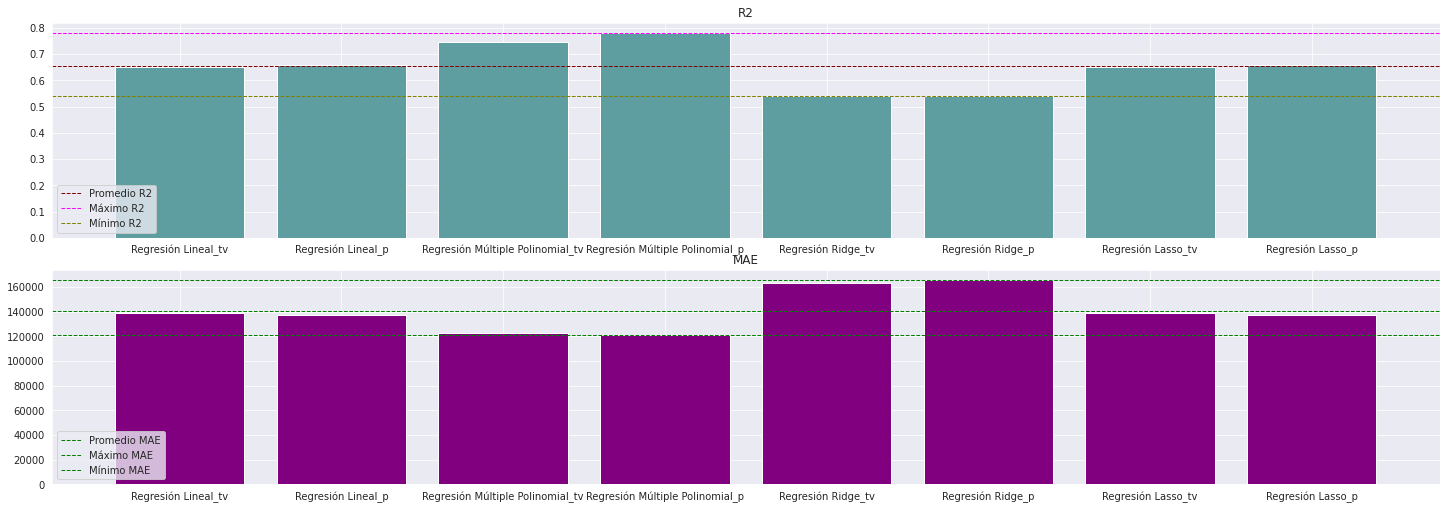

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
plt.tight_layout()

promedio_r2 = np.mean(scores_r2)
max_r2 = np.max(scores_r2)
min_r2 = np.min(scores_r2)
ax[0].axhline(promedio_r2, color='maroon', linestyle='dashed', linewidth=1, label='Promedio R2')
ax[0].axhline(max_r2, color='magenta', linestyle='dashed', linewidth=1, label='Máximo R2')
ax[0].axhline(min_r2, color='olive', linestyle='dashed', linewidth=1, label='Mínimo R2')

promedio_mae = np.mean(scores_mae)
max_mae = np.max(scores_mae)
min_mae = np.min(scores_mae)
ax[1].axhline(promedio_mae, color='green', linestyle='dashed', linewidth=1, label='Promedio MAE')
ax[1].axhline(max_mae, color='green', linestyle='dashed', linewidth=1, label='Máximo MAE')
ax[1].axhline(min_mae, color='green', linestyle='dashed', linewidth=1, label='Mínimo MAE')

for i, nombre in enumerate(nombres):
  ax[0].set_title('R2')
  ax[0].bar([f'{nombre}_tv', f'{nombre}_p'], scores_r2[i], color='cadetblue')

  ax[1].set_title('MAE')
  ax[1].bar([f'{nombre}_tv', f'{nombre}_p'], scores_mae[i], color='purple')

ax[0].legend()
ax[1].legend()
plt.show()

6. Explica tus resultados

- - ¿Qué método conviene más a la empresa, y por qué?

En este ejercicio igualmente llegamos a la conclusión de que el método de regresión polinomial es el cual más le conviene a la empresa, ya que en esta ocasión mostró un menor rango de error, un r2 mayor y mejor resultado en desempeño.

- ¿Qué porcentajes de entrenamiento y evaluación?

Se manejo la partición que previamente se ha utilizado: 80% en entrenamiento y 20% en evaluación.

- ¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?

  - Regresión Múltiple Lineal
    - R2 (Entrenamiento): 0.6529	
    - R2 (Evaluación): 0.6580
    - MAE (Entrenamiento): 139269.3294
    - MAE (Evaluación): 137480.1388
  - Regresión polinomial
    - R2 (Entrenamiento): 0.7470
    - R2 (Evaluación): 0.7798
    - MAE (Entrenamiento): 123190.8086
    - MAE (Evaluación): 121314.0695
  - Ridge
    - R2 (Entrenamiento): 0.5422
    - R2 (Evaluación): 0.5399
    - MAE (Entrenamiento): 163424.1972
    - MAE (Evaluación): 165949.5714
  - Lasso
    - R2 (Entrenamiento): 0.6529	
    - R2 (Evaluación): 0.6579
    - MAE (Entrenamiento): 139269.4893
    - MAE (Evaluación): 137484.4660

En este caso los errores son mucho mayores, alcanzando valores que oscilas desde 121314 hasta 165949. Lo cual es acorde a los datos del precio en nuestra base de datos, los cuales presentan unidades de 35000, ello hace que haya una gran varicación. La regresión múltiple polinomial fue la que presentó mejor desempeño. 

**Conclusiones**

Los métodos de la regresión lineal es utilizada para la predección de el valor de una variable a partir del valor de otra, denominada variable independiente, asímismo el resultado obtenido se le conoce como variable dependiente. Durante la actividad se generaron modelos sencillos a partir de los tipos de datos con los que se contaban, a pesar que no se obtuvieron los mejores resultados, se vio un rendimiento aceptable en el  modelo.